Instalación de las librerias a utilizar

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 14.4 MB/s eta 0:00:00


In [ ]:
pip install yfinance

Importacion de las distintas funciones

In [ ]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
import sktime
import statsmodels as sm
import matplotlib
import sklearn
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, MeanSquaredError, MeanAbsoluteError)
from sklearn.model_selection import GridSearchCV

Carga de la base de datos combinada para el analisis de normalizacion

In [ ]:
BMA_BCol = pd.read_csv('/content/BMA_BCol.csv', index_col='Date', parse_dates=True)

Curva de valores normalizados de los dos Bancos

Text(0, 0.5, 'Precio de las acciones de los 2 bancos normalizado')

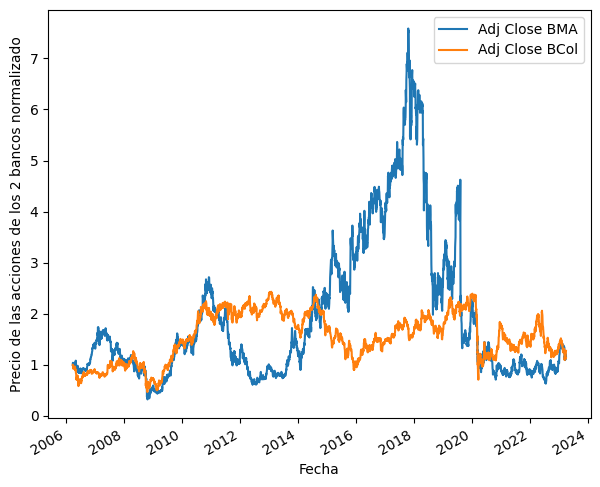

In [ ]:
adj_closing_n = BMA_BCol.div(BMA_BCol.iloc[0])
adj_closing_n.plot(figsize=(7,6))
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones de los 2 bancos normalizado')

In [ ]:
#Valores normalizados

adj_closing_n.head(5)

,Adj Close BMA,Adj Close BCol
Date,,
2006-04-03,1.000000,1.000000
2006-04-04,1.039648,1.003352
2006-04-05,1.030837,0.972905
2006-04-06,0.999559,0.973185
2006-04-07,0.993392,0.933520


Carga de Base de datos

In [ ]:
BCol = pd.read_csv('/content/CIB.csv', index_col='Fecha', parse_dates=True)

BMA = pd.read_csv('/content/BMA.csv', index_col='Fecha', parse_dates=True)

In [ ]:
BCol.head()

,Adj Close
Fecha,
2006-03-31,18.025801
2006-04-03,18.490652
2006-04-04,18.552624
2006-04-05,17.989645
2006-04-06,17.994816


In [ ]:
BMA.head()

,Adj Close
Fecha,
2006-03-31,14.162241
2006-04-03,14.020185
2006-04-04,14.576052
2006-04-05,14.452523
2006-04-06,14.014007


Descomposicion de las series temporales en compenente Ciclico, Tendencial y Residual

In [ ]:
cyclic_BCol, trend_BCol = hpfilter(BCol)

In [ ]:
cyclic_BMA, trend_BMA = hpfilter(BMA)

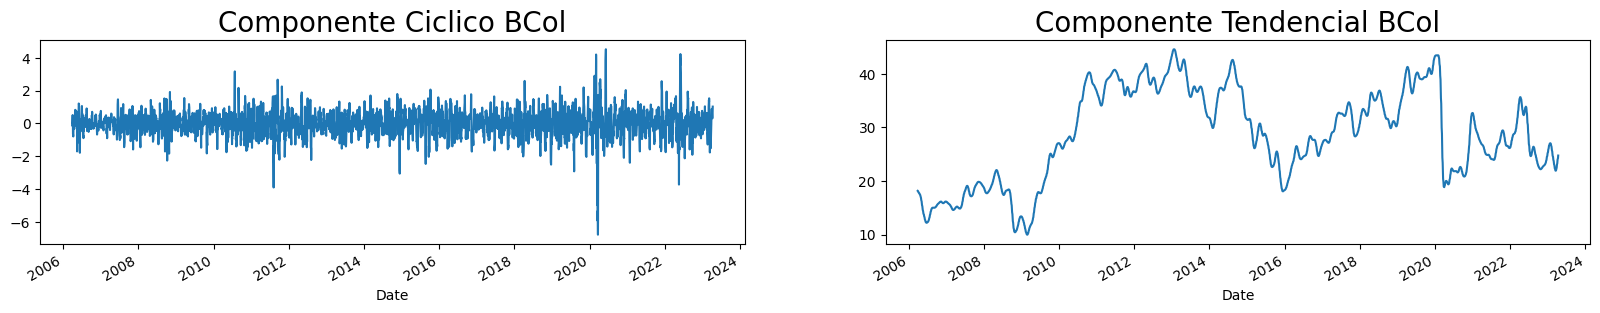

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots(1,2)
cyclic_BCol.plot(ax=ax[0], title='Componente Ciclico BCol')
trend_BCol.plot(ax=ax[1], title='Componente Tendencial BCol')
ax[0].title.set_size(20); ax[1].title.set_size(20)

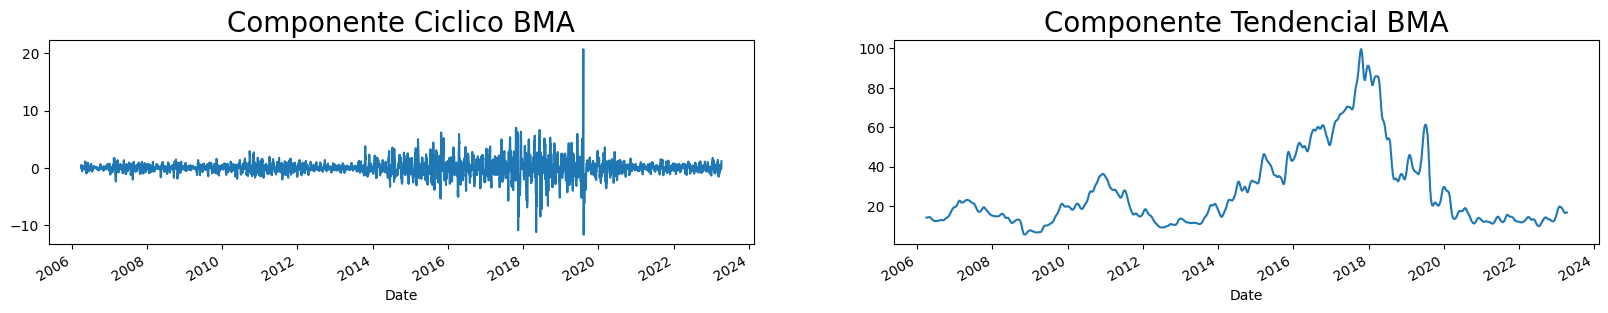

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots(1,2)
cyclic_BMA.plot(ax=ax[0], title='Componente Ciclico BMA')
trend_BMA.plot(ax=ax[1], title='Componente Tendencial BMA')
ax[0].title.set_size(20); ax[1].title.set_size(20)

Descomposición de Estacionariedad para la deteccion de tendencias y periodos de estacionalidad.

In [ ]:
BCol_Descomposicion = seasonal_decompose(x=BCol['Adj Close'],model='additive', extrapolate_trend='freq', period=3)

BMA_Descomposicion = seasonal_decompose(x=BMA['Adj Close'],model='additive', extrapolate_trend='freq', period=3)

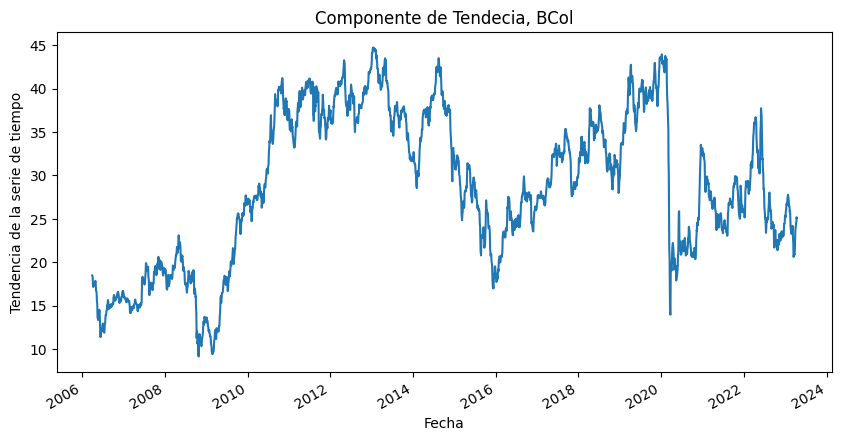

In [ ]:
 Decomposicion_tendencia_BCol = BCol_Descomposicion.trend
 ax= Decomposicion_tendencia_BCol.plot(figsize=(10,5))
 ax.set_xlabel('Fecha')
 ax.set_ylabel('Tendencia de la serie de tiempo')
 ax.set_title('Componente de Tendecia, BCol')
 plt.show()

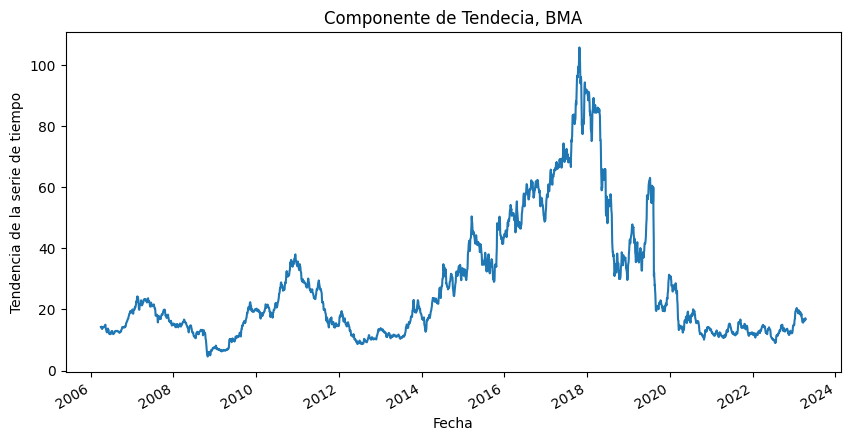

In [ ]:
 Decomposicion_tendencia_BMA = BMA_Descomposicion.trend
 ax= Decomposicion_tendencia_BMA.plot(figsize=(10,5))
 ax.set_xlabel('Fecha')
 ax.set_ylabel('Tendencia de la serie de tiempo')
 ax.set_title('Componente de Tendecia, BMA')
 plt.show()

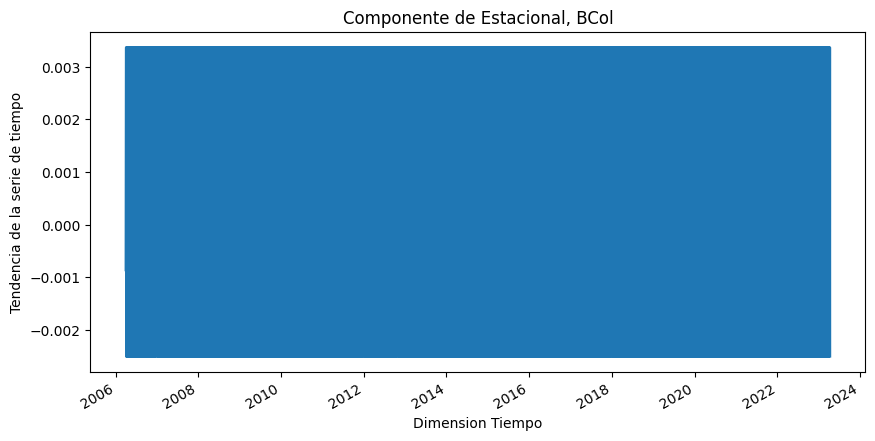

In [ ]:
Decomposicion_Estacional_BCol=BCol_Descomposicion.seasonal
ax= Decomposicion_Estacional_BCol.plot(figsize=(10,5))
ax.set_xlabel('Dimension Tiempo')
ax.set_ylabel('Tendencia de la serie de tiempo')
ax.set_title('Componente de Estacional, BCol')
plt.show()

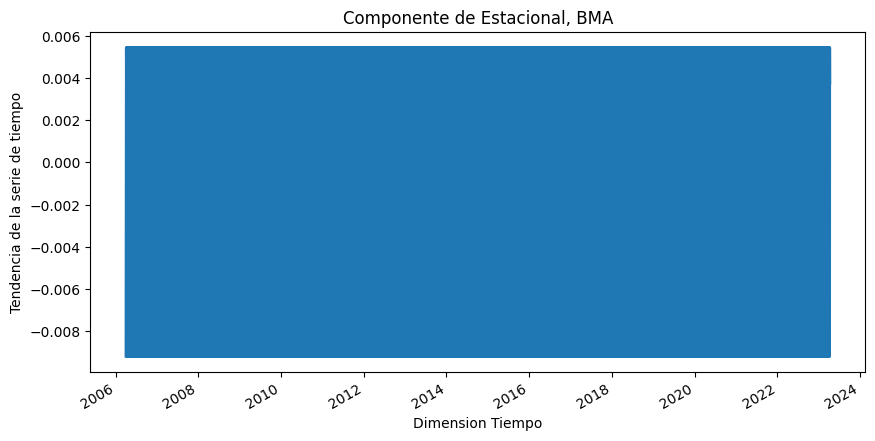

In [ ]:
Decomposicion_Estacional_BMA = BMA_Descomposicion.seasonal
ax= Decomposicion_Estacional_BMA.plot(figsize=(10,5))
ax.set_xlabel('Dimension Tiempo')
ax.set_ylabel('Tendencia de la serie de tiempo')
ax.set_title('Componente de Estacional, BMA')
plt.show()

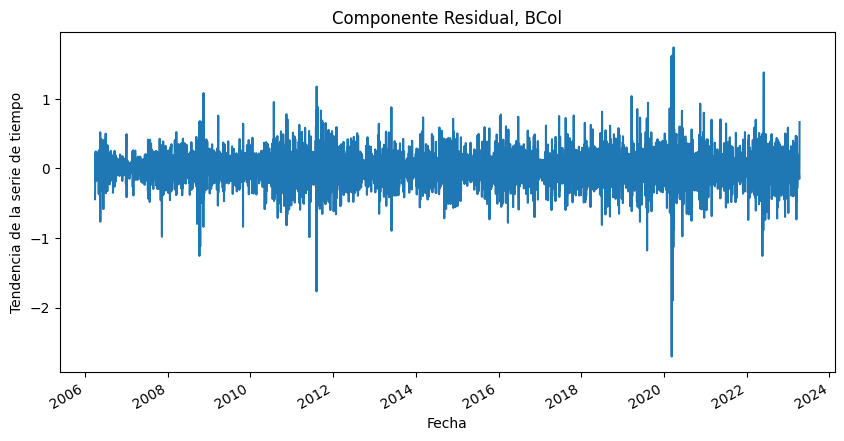

In [ ]:
Decomposicion_Residuo_BCol = BCol_Descomposicion.resid
ax= Decomposicion_Residuo_BCol.plot(figsize=(10,5))
ax.set_xlabel('Fecha')
ax.set_ylabel('Tendencia de la serie de tiempo')
ax.set_title('Componente Residual, BCol')
plt.show()

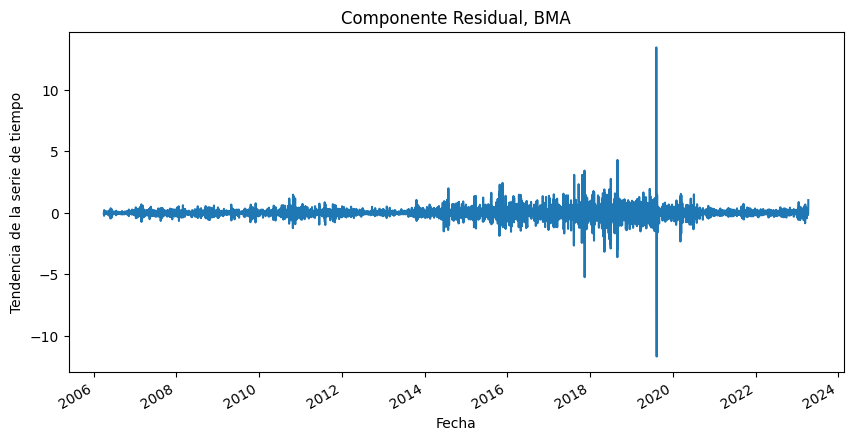

In [ ]:
Decomposicion_Residuo_BMA = BMA_Descomposicion.resid
ax= Decomposicion_Residuo_BMA.plot(figsize=(10,5))
ax.set_xlabel('Fecha')
ax.set_ylabel('Tendencia de la serie de tiempo')
ax.set_title('Componente Residual, BMA')
plt.show()

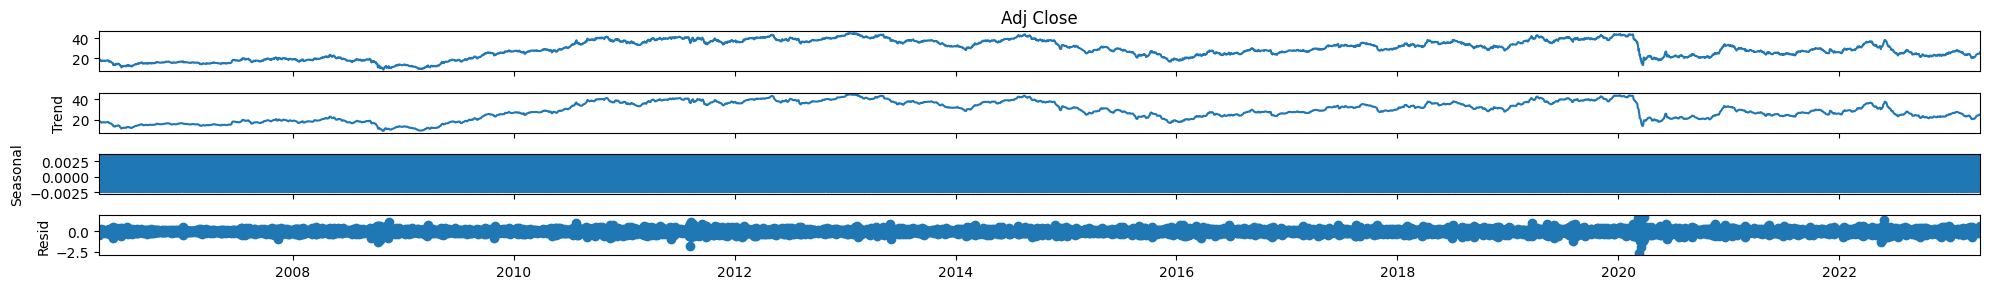

In [ ]:
BCol_Descomposicion.plot()
plt.show()

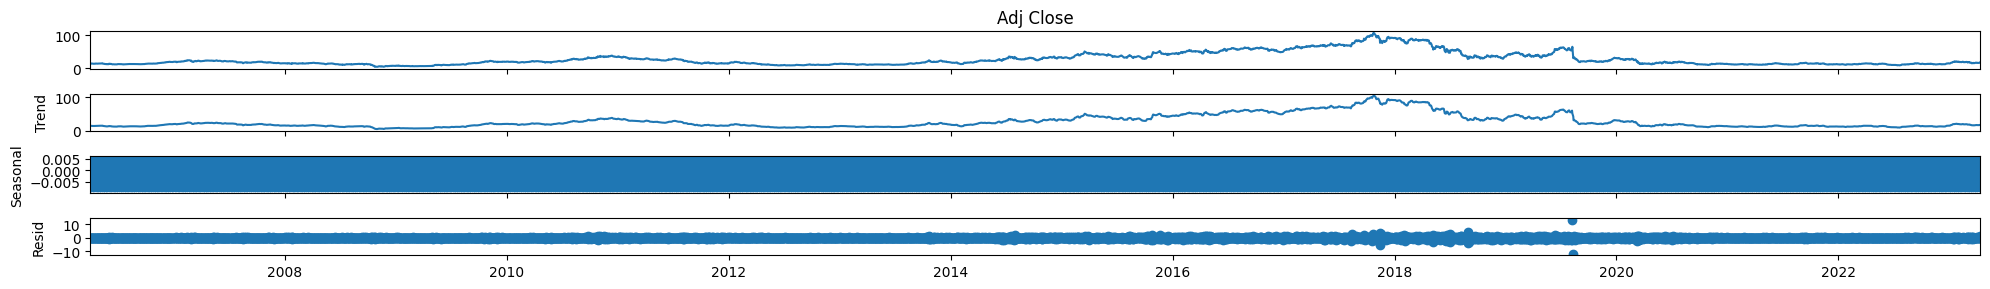

In [ ]:
BMA_Descomposicion.plot()
plt.show()

Analisis estadistico descriptivo

In [ ]:
Banco = 'CIB'

BCol = yf.download(Banco, start='2006-04-01', end='2023-03-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
BCol.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4.278000e+03
mean,42.430423,42.950975,41.885521,42.425442,28.700027,3.832111e+05
std,13.045340,13.068842,12.991372,13.045473,8.719008,2.690571e+05
min,15.700000,16.590000,15.000000,15.330000,8.630240,3.610000e+04
25%,31.700001,32.212500,31.212499,31.650000,21.863935,2.196250e+05
50%,40.115000,40.605000,39.575001,40.125000,28.539595,3.192000e+05
75%,53.490000,53.952499,52.777499,53.407500,36.635752,4.594750e+05
max,70.480003,70.620003,70.059998,70.500000,44.941456,5.932400e+06


In [ ]:
Banco = 'BMA'

BMA = yf.download(Banco, start='2006-04-01', end='2023-03-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
BMA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4.278000e+03
mean,35.835912,36.566484,35.086365,35.823572,27.254522,2.269119e+05
std,25.128858,25.515211,24.733710,25.119370,19.968533,2.773889e+05
min,6.550000,7.110000,4.920000,6.830000,4.513613,3.200000e+03
25%,17.112501,17.505000,16.620001,17.030001,13.064438,9.082500e+04
50%,26.980000,27.540001,26.469999,26.995000,19.257581,1.575000e+05
75%,45.190001,46.335000,44.000000,45.200001,34.710827,2.815750e+05
max,135.130005,136.100006,133.500000,135.460007,106.346512,7.173700e+06


Construccion de funciones a utilizar y la clase Standardize

In [ ]:
def split_data(df, test_split=0.3):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test

In [ ]:
class Standardize:
    def __init__(self, split=0.15):
        self.split = split

    def _transform(self, df):
        return (df - self.mu)/self.sigma

    def split_data(self, df):
        n = int(len(df) * test_split)
        train, test = df[:-n], df[-n:]
        return train, test

    def fit_transform(self, train, test):
        self.mu = train.mean()
        self.sigma = train.std()
        train_s = self._transform(train)
        test_s =  self._transform(test)
        return train_s, test_s

    def transform(self, df):
        return self._transform(df)

    def inverse(self, df):
        return (df * self.sigma)+self.mu

    def inverse_y(self, df):
        return (df * self.sigma[0])+self.mu[0]

In [ ]:
# Definición de las 3 metricas de error

mse = MeanSquaredError()
mape = MeanAbsolutePercentageError()
mae = MeanAbsoluteError()

In [ ]:
def train_model(train, test, regressor, reg_name):
    X_train, y_train  = train.drop(columns=['y']), train['y']
    X_test, y_test  = test.drop(columns=['y']), test['y']

    print(f'training {reg_name} ...')

    regressor.fit(X_train, y_train)

    yhat = regressor.predict(X_test)
    rmse_test = np.sqrt(mse(y_test, yhat))
    mape_test = mape(y_test, yhat)
    mae_test = mae(y_test, yhat)
    residuals = y_test.values - yhat

    model_metadata = {
        'Nombre del Modelo': reg_name, 'Model': regressor,
        'RMSE': rmse_test, 'MAPE': mape_test, 'MAE': mae_test,
        'yhat': yhat, 'resid': residuals, 'actual': y_test.values}

    return model_metadata

In [ ]:
def train_different_models(train, test, regressors):
    results = []
    for reg_name, regressor in regressors.items():
        results.append(train_model(train,
                                   test,
                                   regressor,
                                   reg_name))
    return results

In [ ]:
def plot_results(cols, results, data_name):
    for row in results[cols].iterrows():
        yhat, resid, actual, name = row[1]
        plt.title(f'{data_name} - {name}')
        plt.plot(actual, 'k--', alpha=0.5)
        plt.plot(yhat, 'k')
        plt.legend(['actual', 'forecast'])
        plt.show()

In [ ]:
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()

Transformacion de la serie temporal univariable en una función en base a sus 5 rezagos

In [ ]:
BCol_os = one_step_forecast(BCol, 5)
BMA_os = one_step_forecast(BMA, 5)

Division de las bases de datos en set de entrenamiento y testeo.

In [ ]:
train_BCol, test_BCol = split_data(BCol_os)
print(f'Tamaño Entrenamiento BanColombia : {len(train_BCol)} Tamaño Test BanColombia: {len(test_BCol)}')
train_BMA, test_BMA = split_data(BMA_os)
print(f'Tamaño Entrenamiento Banco Macro Argentina: {len(train_BMA)} Tamaño Test Banco Macro Argentina: {len(test_BMA)}')

Tamaño Entrenamiento BanColombia : 2998 Tamaño Test BanColombia: 1284
Tamaño Entrenamiento Banco Macro Argentina: 2998 Tamaño Test Banco Macro Argentina: 1284


Estandarización de las dos bases de datos y división en set de entrenamiento, test y validación.

In [ ]:
BCol_estand = Standardize(BCol_os)
BMA_estand = Standardize(BMA_os)
train_BCol, test_BCol = BCol_estand.fit_transform(train_BCol, test_BCol)
train_BMA, test_BMA = BMA_estand.fit_transform(train_BMA, test_BMA)

Obtención del set de entrenamiento, validación y test para las variables independientes y dependiente respectivamente.

In [ ]:
X_train_BCol, y_train_BCol  = train_BCol.drop(columns=['y']), train_BCol['y']
X_test_BCol, y_test_BCol  = test_BCol.drop(columns=['y']), test_BCol['y']

In [ ]:
X_train_BMA, y_train_BMA  = train_BMA.drop(columns=['y']), train_BMA['y']
X_test_BMA, y_test_BMA  = test_BMA.drop(columns=['y']), test_BMA['y']

GridSearch para la busqueda del kernel mas eficiente

In [ ]:
# BCol con kernel Lineal
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['linear']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BCol, y_train_BCol)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.974 total time=   0.7s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.946 total time=   0.7s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.991 total time=   0.8s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.987 total time=   0.7s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.974 total time=   0.7s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.997 total time=   0.6s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.946 total time=   0.7s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.991 total time=   0.8s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.987 total time=   0.7s
[CV 1/5] END C=1, epsilon=0.

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 500, 1000], 'epsilon': [0.01, 0.1, 1],
                         'gamma': [0.001, 0.1, 10], 'kernel': ['linear']},
             verbose=3)

In [ ]:
# BCol con kernel Radial Basis Funtion (RBF)
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BCol, y_train_BCol)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.955 total time=   0.2s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.995 total time=   0.2s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.909 total time=   0.2s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.980 total time=   0.2s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.977 total time=   0.2s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.2s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.2s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.2s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.2s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.2s
[CV 1/5] END C=1, epsilon=0.01, gamma=10, kernel=rbf;, sco

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 500, 1000], 'epsilon': [0.01, 0.1, 1],
                         'gamma': [0.001, 0.1, 10], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# BMA con kernel Radial Basis Funtion (RBF)
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BMA, y_train_BMA)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.978 total time=   0.6s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.5s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.992 total time=   0.5s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.982 total time=   0.5s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.946 total time=   0.5s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.6s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.5s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.5s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.3s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=-2.356 total time=   0.3s
[CV 1/5] END C=1, epsilon=0.01, gamma=10, kernel=rbf;, sc

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 500, 1000], 'epsilon': [0.01, 0.1, 1],
                         'gamma': [0.001, 0.1, 10], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# BMA con kernel Polinomial Grado 1
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['poly'],
              'degree': [1]}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BMA, y_train_BMA)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, degree=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=0.976 total time=   1.0s
[CV 2/5] END C=1, degree=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=0.994 total time=   0.7s
[CV 3/5] END C=1, degree=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=0.990 total time=   0.3s
[CV 4/5] END C=1, degree=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=0.980 total time=   0.2s
[CV 5/5] END C=1, degree=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=0.965 total time=   0.2s
[CV 1/5] END C=1, degree=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.989 total time=   0.3s
[CV 2/5] END C=1, degree=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.996 total time=   0.3s
[CV 3/5] END C=1, degree=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.996 total time=   0.3s
[CV 4/5] END C=1, degree=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.992 total time=   0.3s
[CV 5/5] END C=1, degree=1, epsilon=0.01, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 500, 1000], 'degree': [1],
                         'epsilon': [0.01, 0.1, 1], 'gamma': [0.001, 0.1, 10],
                         'kernel': ['poly']},
             verbose=3)

In [ ]:
# BMA con kernel Lineal y rdf
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BMA, y_train_BMA)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.989 total time=   1.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.996 total time=   0.9s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.996 total time=   0.9s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.992 total time=   0.9s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=linear;, score=0.989 total time=   0.4s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.978 total time=   0.3s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.3s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.992 total time=   0.3s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.982 total time=   0.3s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=rbf;, score=0.946 total time=   0.3s
[CV 1/5] END C=1, epsilon=0.01, g

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 500, 1000], 'epsilon': [0.01, 0.1, 1],
                         'gamma': [0.001, 0.1, 10],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
# BCol con kernel Polinomial
param_grid = {'C': [1, 10, 500, 1000],
              'gamma': [0.001, 0.1, 10],
              'epsilon': [0.01, 0.1, 1],
              'kernel': ['poly']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_BCol, y_train_BCol)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=-41.623 total time=   0.2s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=-0.441 total time=   0.2s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=-26.544 total time=   0.2s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=-1.598 total time=   0.2s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.001, kernel=poly;, score=-0.236 total time=   0.2s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=-6.662 total time=   0.2s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.414 total time=   0.2s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=-1.855 total time=   0.2s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.487 total time=   0.2s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=poly;, score=0.356 total time=   0.2s


In [ ]:
#BMA
print(grid.best_params_)

{'C': 1000, 'degree': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
#BMA
print(grid.best_estimator_)

SVR(C=1000, degree=1, epsilon=0.01, gamma=0.1, kernel='poly')


In [ ]:
print(grid.best_params_)

Construccion de DataFrame para la determinacion de los hiperparametros mas optimos en funcion de: RMSE, MAPE y MAE

In [ ]:
#Banco BCol
Modelos_SVM = {
    'Kernel Radial con hiperparam. valor default': SVR(kernel='rbf'),
    'Kernel Radial con hiperparam. optimizados': SVR(kernel='rbf', C=500, epsilon=0.01, gamma=0.001),
    'Kernel Radial con hiperparam. optimizados 2': SVR(kernel='rbf', C=500, epsilon=0.0001, gamma=0.001),
    'Kernel Radial con hiperparam. optimizados 3': SVR(kernel='rbf', C=0.5, epsilon=0.0001, gamma=0.001),
    'Kernel Lineal con hiperparam. valor default': SVR(kernel='linear'),
    'Kernel Lineal con hiperparam. optimizados': SVR(kernel='linear', C=500, epsilon=0.01, gamma=0.001),
    'Kernel Poly Grado 3 con hiperparam. valor default': SVR(kernel='poly'),
    'Kernel Poly Grado 1 con hiperparam. optimizados': SVR(kernel='poly', C=500, epsilon=0.01, gamma=0.001, degree=1),
    'Kernel Poly Grado 1 con hiperparam. optimizados 2': SVR(kernel='poly', C=0.1, epsilon=0.0001, gamma=0.001, degree=1),
    'Kernel Poly Grado 2 con hiperparam. optimizados': SVR(kernel='poly', C=500, epsilon=0.01, gamma=0.001, degree=2),
    'Kernel Poly Grado 3 con hiperparam. optimizados': SVR(kernel='poly', C=500, epsilon=0.01, gamma=0.001, degree=3)
   }

Resultados = train_different_models(train_BCol, test_BCol, Modelos_SVM)
cols = ['Nombre del Modelo', 'RMSE', 'MAPE', 'MAE']
results = pd.DataFrame(Resultados)
results[cols].sort_values('RMSE')

training Kernel Radial con hiperparam. valor default ...
training Kernel Radial con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Radial con hiperparam. optimizados 2 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Radial con hiperparam. optimizados 3 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Lineal con hiperparam. valor default ...
training Kernel Lineal con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 3 con hiperparam. valor default ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 1 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 1 con hiperparam. optimizados 2 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 2 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 3 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

,Nombre del Modelo,RMSE,MAPE,MAE
2,Kernel Radial con hiperparam. optimizados 2,0.072938,0.291227,0.051258
5,Kernel Lineal con hiperparam. optimizados,0.072947,0.290177,0.051206
1,Kernel Radial con hiperparam. optimizados,0.072990,0.291898,0.051280
7,Kernel Poly Grado 1 con hiperparam. optimizados,0.072991,0.290659,0.051264
4,Kernel Lineal con hiperparam. valor default,0.073528,0.291811,0.051548
0,Kernel Radial con hiperparam. valor default,0.075435,0.298938,0.052840
3,Kernel Radial con hiperparam. optimizados 3,0.108790,0.447401,0.075924
8,Kernel Poly Grado 1 con hiperparam. optimizados 2,0.128128,0.473566,0.093226
6,Kernel Poly Grado 3 con hiperparam. valor default,0.398147,0.939451,0.350330
10,Kernel Poly Grado 3 con hiperparam. optimizados,0.536988,0.873309,0.475984


In [ ]:
#Banco Macro de Argentina
Modelos_SVM = {
    'Kernel Radial con hiperparam. valor default': SVR(kernel='rbf'),
    'Kernel Radial con hiperparam. optimizados': SVR(kernel='rbf', C=500, epsilon=0.01, gamma=0.001),
    'Kernel Radial con hiperparam. optimizados 2': SVR(kernel='rbf', C=500, epsilon=0.0001, gamma=0.001),
    'Kernel Radial con hiperparam. optimizados 3': SVR(kernel='rbf', C=0.5, epsilon=0.0001, gamma=0.001),
    'Kernel Lineal con hiperparam. valor default': SVR(kernel='linear'),
    'Kernel Lineal con hiperparam. optimizados': SVR(kernel='linear', C=500, epsilon=0.01, gamma=0.001),
    'Kernel Poly Grado 3 con hiperparam. valor default': SVR(kernel='poly'),
    'Kernel Poly Grado 1 con hiperparam. optimizados': SVR(kernel='poly', C=1000, epsilon=0.01, gamma=0.1, degree=1),
    'Kernel Poly Grado 1 con hiperparam. optimizados 2': SVR(kernel='poly', C=0.1, epsilon=0.0001, gamma=0.001, degree=1),
    'Kernel Poly Grado 2 con hiperparam. optimizados': SVR(kernel='poly', C=500, epsilon=0.01, gamma=0.001, degree=2),
    'Kernel Poly Grado 3 con hiperparam. optimizados': SVR(kernel='poly', C=500, epsilon=0.01, gamma=0.001, degree=3)
   }

Resultados = train_different_models(train_BMA, test_BMA, Modelos_SVM)
cols = ['Nombre del Modelo', 'RMSE', 'MAPE', 'MAE']
results = pd.DataFrame(Resultados)
results[cols].sort_values('RMSE')

training Kernel Radial con hiperparam. valor default ...
training Kernel Radial con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Radial con hiperparam. optimizados 2 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Radial con hiperparam. optimizados 3 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Lineal con hiperparam. valor default ...
training Kernel Lineal con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 3 con hiperparam. valor default ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 1 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 1 con hiperparam. optimizados 2 ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 2 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

training Kernel Poly Grado 3 con hiperparam. optimizados ...


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:455: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect obj

,Nombre del Modelo,RMSE,MAPE,MAE
5,Kernel Lineal con hiperparam. optimizados,0.072751,0.155693,0.036271
7,Kernel Poly Grado 1 con hiperparam. optimizados,0.072779,0.155647,0.036269
1,Kernel Radial con hiperparam. optimizados,0.072875,0.157443,0.036267
2,Kernel Radial con hiperparam. optimizados 2,0.072910,0.157524,0.036259
4,Kernel Lineal con hiperparam. valor default,0.073156,0.149602,0.037888
0,Kernel Radial con hiperparam. valor default,0.083209,0.181855,0.049053
3,Kernel Radial con hiperparam. optimizados 3,0.095665,0.235729,0.051874
8,Kernel Poly Grado 1 con hiperparam. optimizados 2,0.121392,0.277788,0.078027
6,Kernel Poly Grado 3 con hiperparam. valor default,0.563120,1.502095,0.421756
9,Kernel Poly Grado 2 con hiperparam. optimizados,0.591500,1.805803,0.511925


In [ ]:
BCol_os = one_step_forecast(BCol, 5)
BMA_os = one_step_forecast(BMA, 5)

Renombramiento de variables

In [ ]:
BCol_os.rename(columns={"x_1": "Precio a Dia 0", "x_2": "Precio a Dia 1", "x_3": "Precio a Dia 2", "x_4": "Precio a Dia 3",
                       "x_5": "Precio a Dia 4", "y": "Precio de Cierre Real",}, inplace=True)

In [ ]:
BMA_os.rename(columns={"x_1": "Precio a Dia 0", "x_2": "Precio a Dia 1", "x_3": "Precio a Dia 2", "x_4": "Precio a Dia 3",
                       "x_5": "Precio a Dia 4", "y": "Precio de Cierre Real",}, inplace=True)

In [ ]:
train_BCol, test_BCol = split_data(BCol_os)
print(f'Tamaño Entrenamiento BanColombia : {len(train_BCol)} Tamaño Test BanColombia: {len(test_BCol)}')
train_BMA, test_BMA = split_data(BMA_os)
print(f'Tamaño Entrenamiento Banco Macro Argentina: {len(train_BMA)} Tamaño Test Banco Macro Argentina: {len(test_BMA)}')

Tamaño Entrenamiento BanColombia : 2998 Tamaño Test BanColombia: 1284
Tamaño Entrenamiento Banco Macro Argentina: 2998 Tamaño Test Banco Macro Argentina: 1284


Estandarizacion del set de entrenaimiento y test.

In [ ]:
BCol_estand = Standardize(BCol_os)
BMA_estand = Standardize(BMA_os)
train_BCol, test_BCol = BCol_estand.fit_transform(train_BCol, test_BCol)
train_BMA, test_BMA = BMA_estand.fit_transform(train_BMA, test_BMA)

Obtencion del set de entrenamiento y test para las variables independientes y la variable dependiente.

In [ ]:
#BCol
X_train_BCol, y_train_BCol  = train_BCol.drop(columns=['Precio de Cierre Real']), train_BCol['Precio de Cierre Real']
X_test_BCol, y_test_BCol  = test_BCol.drop(columns=['Precio de Cierre Real']), test_BCol['Precio de Cierre Real']

In [ ]:
#BMA
X_train_BMA, y_train_BMA  = train_BMA.drop(columns=['Precio de Cierre Real']), train_BMA['Precio de Cierre Real']
X_test_BMA, y_test_BMA  = test_BMA.drop(columns=['Precio de Cierre Real']), test_BMA['Precio de Cierre Real']

Defirentes modelos de SVM

In [ ]:
svr_BCol = SVR(kernel='rbf', C=500, epsilon=0.01, gamma=0.001 ).fit(X_train_BCol, y_train_BCol)

In [ ]:
svr_BCol = SVR(kernel='poly', C=0.05, epsilon=0.0001, gamma=0.001, degree=1).fit(X_train_BCol, y_train_BCol)

In [ ]:
svr_BMA = SVR(kernel='poly', C=0.05, epsilon=0.0001, gamma=0.001, degree=1).fit(X_train_BMA, y_train_BMA)

In [ ]:
svr_BCol = SVR(kernel='poly', degree=1, C=0.1, epsilon=0.01, gamma=0.001 ).fit(X_train_BCol, y_train_BCol)

In [ ]:
svr_BMA = SVR(kernel='rbf', C=500, epsilon=0.01, gamma=0.001 ).fit(X_train_BMA, y_train_BMA)

In [ ]:
svr_BMA = SVR(kernel='rbf', C=0.5, epsilon=0.01, gamma=0.001 ).fit(X_train_BMA, y_train_BMA)

In [ ]:
svr_BMA = SVR(kernel='linear', C=0.5, epsilon=0.01, gamma=0.001 ).fit(X_train_BMA, y_train_BMA)

In [ ]:
svr_BCol = SVR(kernel='linear', C=500, epsilon=0.01, gamma=0.001 ).fit(X_train_BCol, y_train_BCol)

SVM con hiperparametros óptimos.

In [ ]:
svr_BCol_optimizado = SVR(kernel='rbf', C=0.5, epsilon=0.0001, gamma=0.001).fit(X_train_BCol, y_train_BCol)

svr_BMA_optimizado = SVR(kernel='rbf', C=0.5, epsilon=0.0001, gamma=0.001).fit(X_train_BMA, y_train_BMA)

In [ ]:
#Prediccion BCol
prediccion_BCol = svr_BCol_optimizado.predict(X_test_BCol)
prediccion_BCol = BCol_estand.inverse_y(prediccion_BCol)

In [ ]:
#Prediccion BMA
prediccion_BMA = svr_BMA_optimizado.predict(X_test_BMA)
prediccion_BMA = BMA_estand.inverse_y(prediccion_BMA)

In [ ]:
prediccion_BMA.shape

(1284,)

Banco Macro Argentina. SVM. Valores reales y pronosticados

Gráfica

<ipython-input-25-0a7cb93a517e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_BMA['Precio de Cierre Pronosticado'] = prediccion_BMA


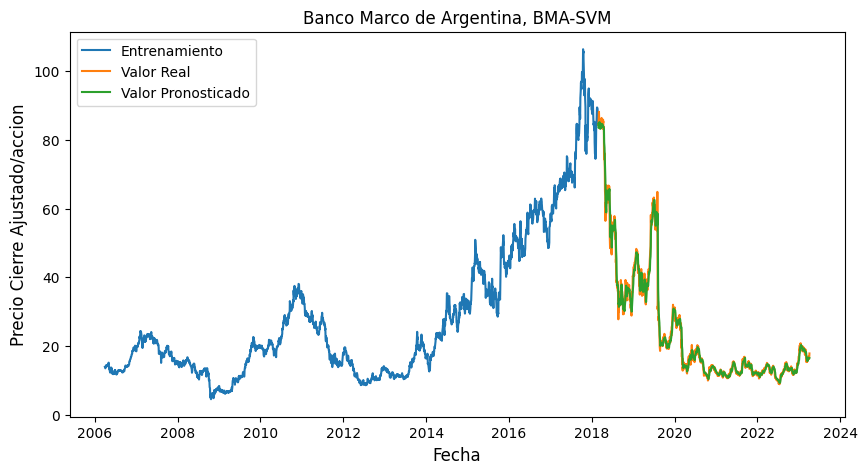

In [ ]:
train = BMA_os[:len(train_BMA)]
test_BMA = BMA_os[len(train_BMA):]
test_BMA['Precio de Cierre Pronosticado'] = prediccion_BMA

plt.figure(figsize=(10,5))
plt.title('Banco Marco de Argentina, BMA-SVM')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Cierre Ajustado/accion', fontsize=12)
plt.plot(train['Precio de Cierre Real'])
plt.plot(test_BMA[['Precio de Cierre Real', 'Precio de Cierre Pronosticado']])
plt.legend(['Entrenamiento', 'Valor Real', 'Valor Pronosticado'], loc='upper left')
plt.show()

Comparación de valores Reales y Pronosticados.

In [ ]:
test_BMA.loc['2023-03-15':'2023-03-31', ['Precio de Cierre Real','Precio de Cierre Pronosticado']].round(2)

,Precio de Cierre Real,Precio de Cierre Pronosticado
Fecha,,
2023-03-15,15.97,15.80
2023-03-16,15.54,15.91
2023-03-17,15.53,15.72
2023-03-20,16.46,15.67
2023-03-21,16.60,15.93
2023-03-22,16.95,16.04
2023-03-23,16.95,16.27
2023-03-24,16.25,16.52
2023-03-27,16.81,16.56


BanColombia. SVM. Valores reales y pronosticados

Gráfica

<ipython-input-26-7afd83089692>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_BCol['Precio de Cierre Pronosticado'] = prediccion_BCol


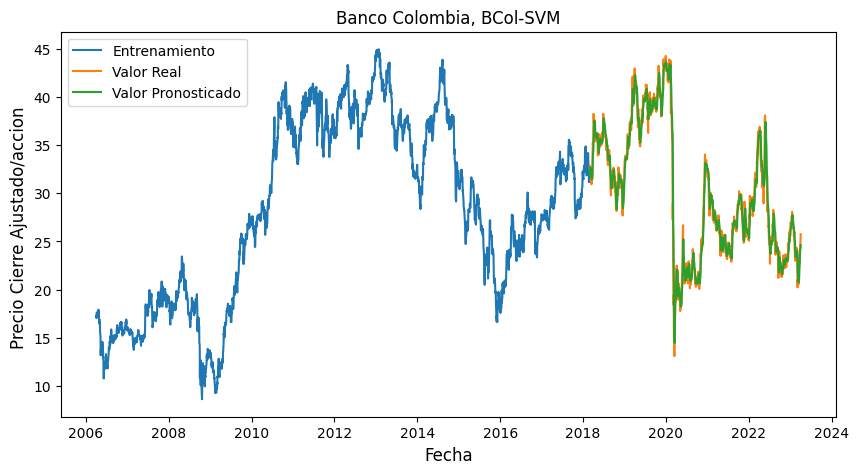

In [ ]:
train = BCol_os[:len(train_BCol)]
test_BCol = BCol_os[len(train_BCol):]
test_BCol['Precio de Cierre Pronosticado'] = prediccion_BCol

plt.figure(figsize=(10,5))
plt.title('Banco Colombia, BCol-SVM')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Cierre Ajustado/accion ', fontsize=12)
plt.plot(train['Precio de Cierre Real'])
plt.plot(test_BCol[['Precio de Cierre Real', 'Precio de Cierre Pronosticado']])
plt.legend(['Entrenamiento', 'Valor Real', 'Valor Pronosticado'], loc='upper left')
plt.show()

In [ ]:
type(test_BCol)

pandas.core.frame.DataFrame

Comparación de valores Reales y Pronosticados.

In [ ]:
test_BCol.loc['2023-03-15':'2023-03-31', ['Precio de Cierre Real','Precio de Cierre Pronosticado']].round(2)

,Precio de Cierre Real,Precio de Cierre Pronosticado
Fecha,,
2023-03-15,21.06,20.82
2023-03-16,20.54,20.96
2023-03-17,20.85,20.81
2023-03-20,21.54,20.87
2023-03-21,22.02,21.09
2023-03-22,22.56,21.34
2023-03-23,23.11,21.70
2023-03-24,23.54,22.22
2023-03-27,24.16,22.75


Renombramiento de las variables para la generacion de las figuras 2.6, 2.7, 2.8 y 2.9.

Se procede de la misma forma que en los pasos anteriores.

In [ ]:
BMA_os.rename(columns={"x_1": "Precio a Dia 0", "x_2": "Precio a Dia 1", "x_3": "Precio a Dia 2", "x_4": "Precio a Dia 3",
                       "x_5": "Precio a Dia 4", "y": "Precio Objetivo",}, inplace=True)

In [ ]:
BCol_os.rename(columns={"x_1": "Precio a Dia 0", "x_2": "Precio a Dia 1", "x_3": "Precio a Dia 2", "x_4": "Precio a Dia 3",
                       "x_5": "Precio a Dia 4", "y": "Precio Objetivo",}, inplace=True)